# Modules

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [51]:
Tc = 273.65  # K
Th = 292.65  # K
T_catalysis = 292.65  # K
data_Tc = pd.read_csv("reaction-Tc.txt")
data_Th = pd.read_csv("reaction-Th.txt")

In [52]:
data_Tc

,VKMnO4(L),Vwater(L),t(s)
0,0.0050,0.0000,0
1,0.0040,0.0010,317
2,0.0030,0.0020,615
3,0.0025,0.0025,811
4,0.0020,0.0030,968
5,0.0010,0.0040,1065


In [53]:
data_Th

,VKMnO4(L),Vwater(L),t(s)
0,0.0050,0.0000,0
1,0.0040,0.0010,21
2,0.0030,0.0020,51
3,0.0025,0.0025,69
4,0.0020,0.0030,92
5,0.0010,0.0040,114


# Rate constants

## $Tc$

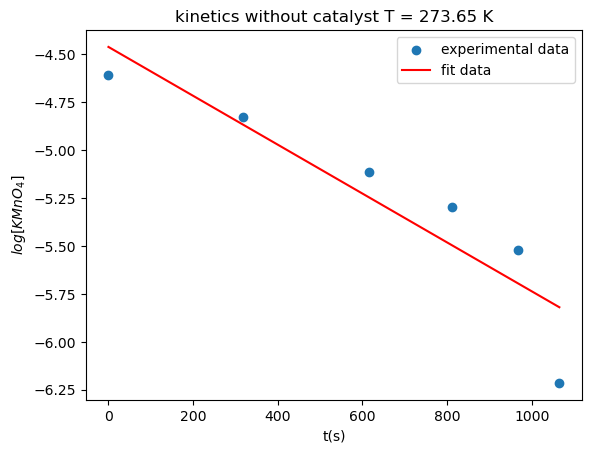

In [54]:
concetration_Tc = (data_Tc["VKMnO4(L)"] * 0.01)/ (data_Tc["VKMnO4(L)"] + data_Tc["Vwater(L)"])

fig,ax = plt.subplots()
ax.scatter( data_Tc["t(s)"] , np.log( concetration_Tc ) , label = "experimental data" )
ax.set_xlabel("t(s)")
ax.set_ylabel("$log[KMnO_4]$")
ax.set_title("kinetics without catalyst T = "+str(Tc)+" K")

coeff , cov = np.polyfit( data_Tc["t(s)"] , np.log( concetration_Tc )  , 1,cov=True)
fit = np.poly1d(coeff)

ax.plot(  data_Tc["t(s)"] , fit( data_Tc["t(s)"] )  , color = "red"  , label = "fit data" )
plt.legend()
plt.show()

In [55]:
concetration_Tc

0    0.010
1    0.008
2    0.006
3    0.005
4    0.004
5    0.002
dtype: float64

In [56]:
k_c = round( -coeff[0] , 4 )
deltak_c = round( np.sqrt( cov[0][0] ) , 4 )
"The rate constant is (" + str( k_c )+ " +- "+str(deltak_c) + ") s^-1"

'The rate constant is (0.0013 +- 0.0003) s^-1'

## $Th$

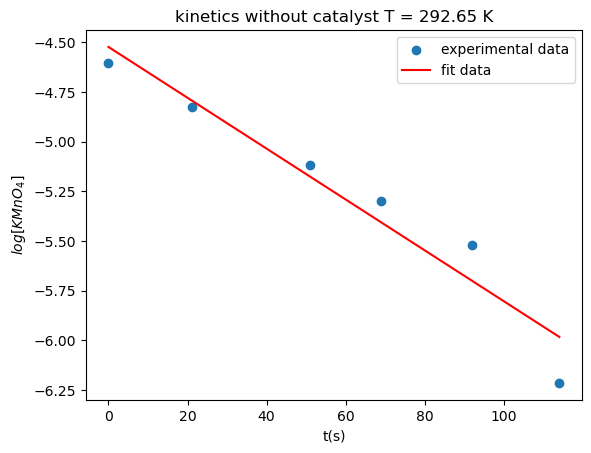

In [57]:
concetration_Th = (data_Th["VKMnO4(L)"] * 0.01)/ (data_Th["VKMnO4(L)"] + data_Th["Vwater(L)"])

fig,ax = plt.subplots()
ax.scatter( data_Th["t(s)"] , np.log( concetration_Th ) , label = "experimental data" )
ax.set_xlabel("t(s)")
ax.set_ylabel("$log[KMnO_4]$")
ax.set_title("kinetics without catalyst T = "+str(Th)+" K")

coeff , cov = np.polyfit( data_Th["t(s)"] , np.log( concetration_Th )  , 1,cov=True)
fit = np.poly1d(coeff)

ax.plot(  data_Th["t(s)"] , fit( data_Th["t(s)"] )  , color = "red"  , label = "fit data" )
plt.legend()
plt.show()

In [58]:
k_h = round( -coeff[0] , 3 )
deltak_h = round( np.sqrt( cov[0][0] ) , 3 )
"The rate constant is (" + str( k_h )+ " +- "+str(deltak_h) + ") s^-1"

'The rate constant is (0.013 +- 0.002) s^-1'

# Energy activation

In [59]:
R = 8.314*1e-3
E = round( np.log(  k_c / k_h) * (   ( Tc*Th ) / ( Tc-Th )  ) * R )

deltaE_k_c = ( deltak_c / k_c ) * (   ( Tc*Th ) / ( Tc-Th )  ) * R
deltaE_k_h = ( deltak_h / k_h ) * (   ( Tc*Th ) / ( Tc-Th )  ) * R

deltaE = round( np.sqrt( deltaE_k_h**2 + deltaE_k_c**2 ) )

"The energy activation is ( " + str(E) + " +- " + str(deltaE) + " ) KJ /mol "

'The energy activation is ( 81 +- 10 ) KJ /mol '

# Frecuency factor

It can be shown that $A = \frac{   k_c + k_h      }{ e^{-E/(R*Tc}    + e^{-E/(R*Th}      }$

In [60]:
A = round( ( (  k_c  + k_h ) / (  np.exp( -E/(R*Tc)  ) + np.exp( -E/(R*Th)  )    ) )*1e-12 ,1)

"The frecuency factor is " + str(A) + " e^12 s^-1"

'The frecuency factor is 3.7 e^12 s^-1'

# half life 20°C

In [61]:
half_life = round( -np.log(1/2) / k_h )
"The half life of the reaction in 20°C is " + str(half_life) + " s"

'The half life of the reaction in 20°C is 53 s'

# Note

If we have a initial concetration of $A_0$ and we need to arrive to concetration of $B$, the time used is

$t = \frac{ lnA_0  }{  k } - \frac{ lnB }{  k }$

From the above we conclude that if the initial concentration is increased, there is a longer time to reach a fixed final concentration.
Since it is not feasible to measure the concentration for different instants of time, we use a different method given by the following equation:

$t_i = t^+ - t'_i$

Where $t_i$ is the time when te concetration is $C_i$, $t'_i$ is time for complete the reaction when the concetration is $C_i$ and $t^+$ is the time for complete the reaction when the concetration is $max\{C_i\}_i$

Using the above we have concentration vs. time data for a reaction with initial concentration $max\{C_i\}_i$